# Which Movies Movies Are The Most Successful?

We defined success as **revenue generated**. We decided to analyze top 10 studio competitors; domestic vs worldwide revenue growth; budget vs revenue generated; month released vs revenue generated. 

## Importing and Reading

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('Data/tn.movie_budgets.csv.gz')
df1 = pd.read_csv('Data/bom.movie_gross.csv.gz')
df3 = pd.read_csv('Data/tn.movie_budgets.csv.gz')

## Cleaning 

In [2]:
# cleaning for Domestic & Worldwide Revenue
# remove dollar signs
df.production_budget = df.production_budget.replace('\$','', regex = True)
df.domestic_gross = df.domestic_gross.replace('\$','', regex = True)
df.worldwide_gross = df.worldwide_gross.replace('\$','', regex = True)

# remove commas
df.production_budget = df.production_budget.replace('\,','', regex = True)
df.domestic_gross = df.domestic_gross.replace('\,','', regex = True)
df.worldwide_gross = df.worldwide_gross.replace('\,','', regex = True)

df.worldwide_gross = df.worldwide_gross.astype('int')
df.domestic_gross = df.domestic_gross.astype('int')
df.production_budget = df.production_budget.astype('int')

df['release_date'] =  pd.to_datetime(df['release_date'], infer_datetime_format=True)
df = df[(df['release_date'].dt.year >= 1988) & (df['release_date'].dt.year <= 2018)]

# drop movie title because it's not relevant to this analysis
df = df.drop(['movie'], axis=1)

# some rows had an impossible value (0) so I dropped those
df = df[(df != 0).all(1)]

df['release_date'] = pd.to_datetime(df.release_date, format='%y', errors='coerce').dt.year
df.sort_values(by='release_date')
df = df.groupby('release_date').sum().reset_index()
df.head()

,release_date,id,production_budget,domestic_gross,worldwide_gross
0,1988,1638,478000000,1363870583,2353736079
1,1989,1610,607840000,1671717395,2652711244
2,1990,1293,786830000,2206765103,4037229644
3,1991,2082,860008000,2137146850,3611227219
4,1992,1853,913100000,2204300455,4027022156


In [3]:
# Cleaning for Top 10 Competitors 
df1.isna().sum()
df1.dropna(inplace=True)
df1.drop(['foreign_gross'], axis=1, inplace=True)

df1.year = df1.year.astype('str')
df1['year'] =  pd.to_datetime(df1['year'], infer_datetime_format=True)

# we chose to only look at competitors over the last 5 years so we eliminated anything before 2013
df1 = df1[(df1['year'].dt.year >= 2013)]

df1 = df1.groupby('studio').sum().reset_index()
df1 = df1.sort_values('domestic_gross', ascending=False)
df1 = df1.reset_index()
df1 = df1[0:10]
df1.head()

,index,studio,domestic_gross
0,14,BV,1.412650e+10
1,102,Uni.,9.614138e+09
2,41,Fox,7.927700e+09
3,108,WB,7.837100e+09
4,91,Sony,5.115179e+09


In [4]:
df3['release_date'] =  pd.to_datetime(df3['release_date'], infer_datetime_format=True)
df3 = df3[(df3['release_date'].dt.year >= 2013)]
df3.production_budget = df3.production_budget.replace('\$','', regex = True)


df3.production_budget = df3.production_budget.replace('\,','', regex = True)

df3.domestic_gross = df3.domestic_gross.replace('\$','', regex = True)
#cleaned the data in order to disable the function of commas, and replace, commas with nothing so that the data can be imported as a numerical value in seaborn


df3.domestic_gross = df3.domestic_gross.replace('\,','', regex = True)

df3.worldwide_gross = df3.worldwide_gross.replace('\$','', regex = True)

df3.worldwide_gross = df3.worldwide_gross.replace('\,','', regex = True)

df3.production_budget = df3.production_budget.astype(int)
df3.domestic_gross = df3.domestic_gross.astype(int)
df3.worldwide_gross = df3.worldwide_gross.astype(int)
df3 = df3[:30]
df3.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200


In [5]:
df4 = df3
df4['release_date'] = pd.to_datetime(df4.release_date, format='%b', errors='coerce').dt.month
df4.sort_values(by='release_date')
df4.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
2,3,6,Dark Phoenix,350000000,42762350,149762350
3,4,5,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,12,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,6,12,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,4,Avengers: Infinity War,300000000,678815482,2048134200


## Plotting

(0.0, 30000000000)

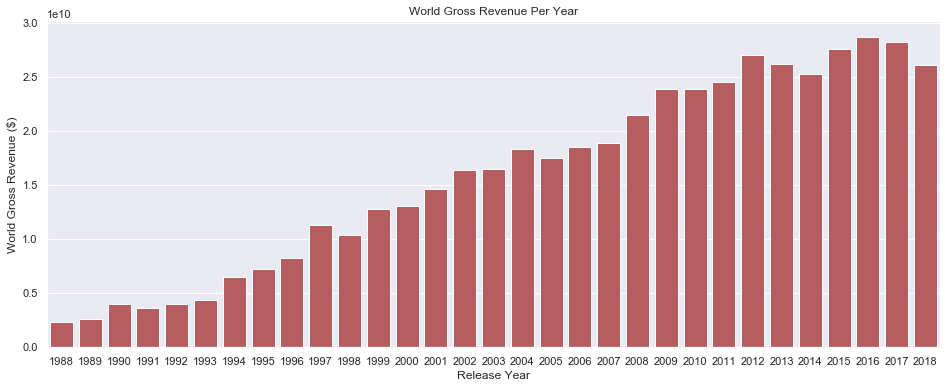

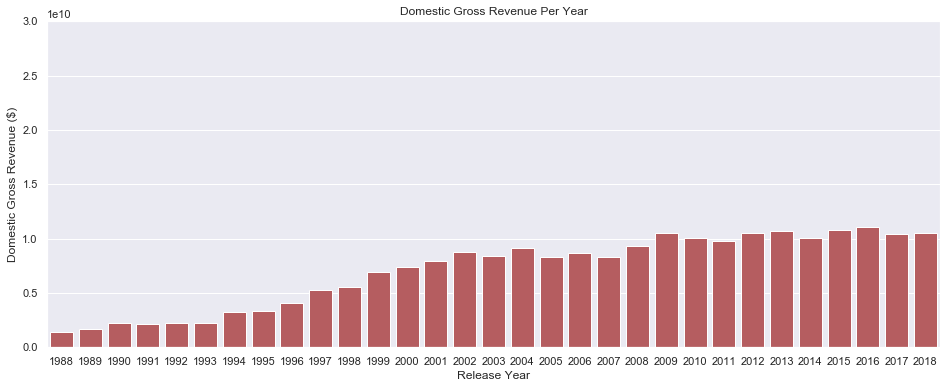

In [6]:
sns.set(style='darkgrid')
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="release_date", y="worldwide_gross", data=df, color="r")
plt.xlabel('Release Year')
plt.ylabel('World Gross Revenue ($)') 
plt.title('World Gross Revenue Per Year')


plt.figure(figsize=(16, 6))
ax = sns.barplot(x="release_date", y="domestic_gross", data=df, color="r");
plt.xlabel('Release Year')
plt.ylabel('Domestic Gross Revenue ($)')
plt.title('Domestic Gross Revenue Per Year')
plt.ylim(top=30000000000)

**These two graphs compare gross revenue per year worldwide vs domestic revenue per year worldwide, over the last 30 years. You can see that worldwide revenue is growing faster than domestic revenue. Don't neglect foreign markets**

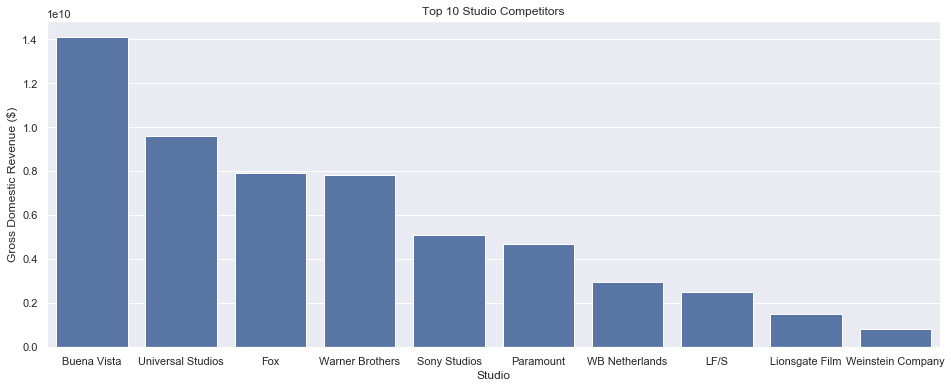

In [7]:
plt.figure(figsize=(16, 6))
ax1 = sns.barplot(x="studio", y="domestic_gross", data=df1, color="b")
plt.xlabel('Studio')
plt.ylabel('Gross Domestic Revenue ($)') # highest value is $14,000,000,000
plt.title('Top 10 Studio Competitors')
sns.set(style='darkgrid')
plt.xticks(range(10), ['Buena Vista', 'Universal Studios', 'Fox', 'Warner Brothers', 'Sony Studios', 'Paramount','WB Netherlands','LF/S','Lionsgate Film','Weinstein Company']);

**This graph shows your top 10 competitors domestically. We recommend reaching out to these studios for advising. Alternatively, further study could reveal *why* these studios are successful**

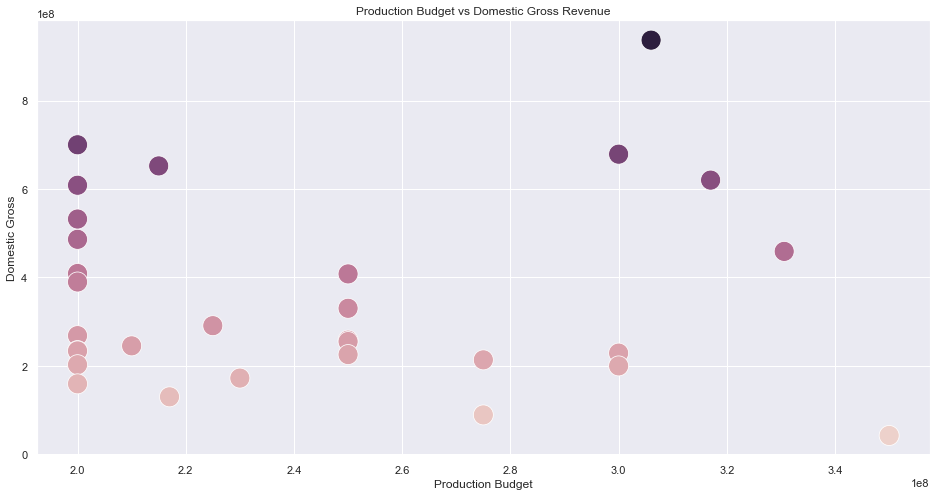

In [11]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x= df3.production_budget, y= df3.domestic_gross, hue= df3.domestic_gross, data= df3, ci = None, s= 400, legend = None)

plt.title('Production Budget vs Domestic Gross Revenue')
plt.xlabel('Production Budget')
plt.ylabel('Domestic Gross')
sns.set(style='darkgrid')


**This graph shows production budget compared to domestic revenue. We wanted to know at what level of investment you get the highest return on investment.**

(0.0, 2000000000)

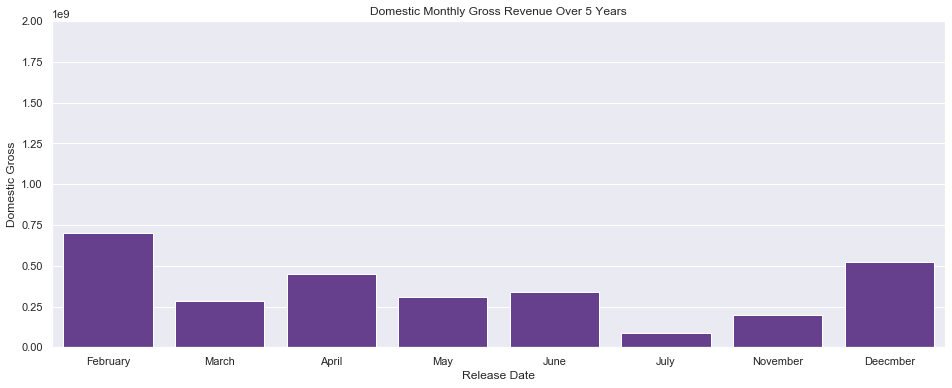

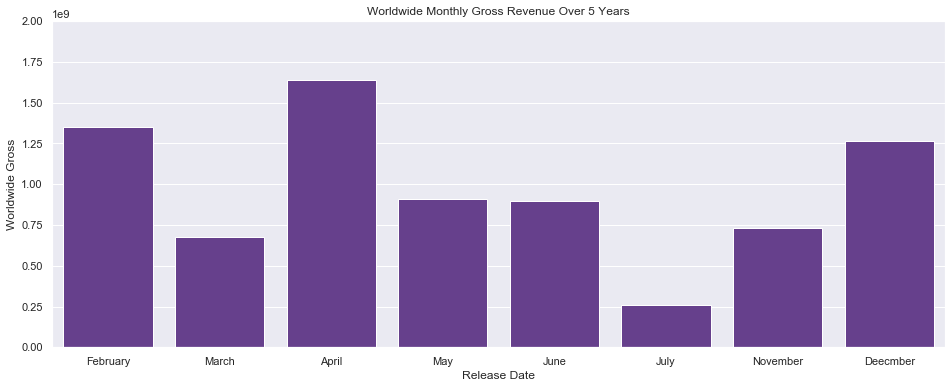

In [12]:
plt.figure(figsize=(16, 6))
sns.barplot(x= df4.release_date, y= df4.domestic_gross, color = 'rebeccapurple', data= df4, ci = None)
plt.xticks(range(8), ['February', 'March', 'April', 'May', 'June', 'July','November','Deecmber']);
plt.title('Domestic Monthly Gross Revenue Over 5 Years')
plt.xlabel('Release Date')
plt.ylabel('Domestic Gross')
plt.ylim(top=2000000000)

plt.figure(figsize=(16, 6))
sns.barplot(x= df4.release_date, y= df4.worldwide_gross, color = 'rebeccapurple', data= df4, ci = None)
plt.xticks(range(8), ['February', 'March', 'April', 'May', 'June', 'July','November','Deecmber']);
plt.title('Worldwide Monthly Gross Revenue Over 5 Years')
plt.xlabel('Release Date')
plt.ylabel('Worldwide Gross')
plt.ylim(top=2000000000)

**We wanted to compare monthly revenue domestically and worldwide to see what release month generates the most revenue.**

## Recommendations

1. Over the last 30 years, movies have increasingly generate more revenue both domestically and worldwide. However, since worldwide growth is faster, we reccomend not neglecting foreign market releases.

2. Model your studio practices after one of the top 5 movie studios. Alternatively, comission a longer study that investigstes why these studios are successfull (director, budget, etc).

3. Because higher investments do have a direct relationship with higher domestic gross, manage risk by setting budget limitations between 2 and 2.5.

4. Plan to release worldwide movies in April or February. Plan to release domestic movies in February, keeping in mind prior budget limitations. 